In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import looptools.pll as pll
import looptools.auxiliary as aux

import pypm.pm.pll as alt_pll

import logging
logging.basicConfig(
    format='%(asctime)s %(levelname)-8s %(message)s',
    level=logging.INFO,
    datefmt='%Y-%m-%d %H:%M:%S'
)

In [6]:
sps = 80e6 # PLL clock rate
frfr = np.logspace(np.log10(1e-6), np.log10(1e6), int(1e5)) # Fourier frequency array (Hz)

In [16]:
parameters_pll = {
    "Amp": 1e-4,     # normalized signal amplitude
    "Cshift": 19,        # Gain bit shift (right)
    "Klf": 5,            # LF bit shift (right) 5
    "twostages":True,    # Two stages for LF
    "Kp": 18,            # P bit shift (left) 18
    "Ki": 4,             # I bit shift (left) 4
    "n_reg": 10          # Number of registers
}

pll_1 = pll.PLL(
    sps, 
    parameters_pll["Amp"], 
    parameters_pll["Cshift"], 
    parameters_pll["Klf"], 
    parameters_pll["Kp"], 
    parameters_pll["Ki"], 
    twostages=parameters_pll["twostages"],
    n_reg=parameters_pll["n_reg"]
)

pll_2 = alt_pll.PLL(
    sps, 
    parameters_pll["Amp"], 
    parameters_pll["Cshift"], 
    parameters_pll["Klf"], 
    parameters_pll["Kp"], 
    parameters_pll["Ki"], 
    twostages=parameters_pll["twostages"],
    n_reg=parameters_pll["n_reg"]
)

ugf, margin = aux.get_margin(pll_1.Gf(f=frfr), frfr, deg=True) # compute UGF and phase margin

In [ ]:
def loop_bode_plot(frfr, loop, loop2=None):
    figsize=(6,4)
    dpi=300
    fontsize=8
    linewidth=2

    fig, (ax1, ax2) = plt.subplots(2,1, figsize=figsize, dpi=dpi);
    ax1.loglog(frfr, np.abs(loop.Gf(f=frfr)), linewidth=linewidth, color="royalblue", label="Open-loop transfer function")
    ax2.semilogx(frfr, np.angle(loop.Gf(f=frfr), deg=True), linewidth=linewidth, color="royalblue")
    ax1.loglog(frfr, np.abs(loop.Hf(f=frfr)), linewidth=linewidth, color="lime", label="System function", ls='-')
    ax2.semilogx(frfr, np.angle(loop.Hf(f=frfr), deg=True), linewidth=linewidth, color="lime", ls='-')
    ax1.loglog(frfr, np.abs(loop.Ef(f=frfr)), linewidth=linewidth, color="tomato", label="Error function", ls='-')
    ax2.semilogx(frfr, np.angle(loop.Ef(f=frfr), deg=True), linewidth=linewidth, color="tomato", ls='-')
    if loop2 is not None:
        ax1.loglog(frfr, np.abs(loop2.Gf(f=frfr)), linewidth=1.0, color="black", ls='--')
        ax2.semilogx(frfr, np.angle(loop2.Gf(f=frfr), deg=True), linewidth=1.0, color="black", ls='--')
        ax1.loglog(frfr, np.abs(loop2.Hf(f=frfr)), linewidth=1.0, color="black", ls='--')
        ax2.semilogx(frfr, np.angle(loop2.Hf(f=frfr), deg=True), linewidth=1.0, color="black", ls='--')
        ax1.loglog(frfr, np.abs(loop2.Ef(f=frfr)), linewidth=1.0, color="black", ls='--')
        ax2.semilogx(frfr, np.angle(loop2.Ef(f=frfr), deg=True), linewidth=1.0, color="black", ls='--')
    for ax in (ax1, ax2):
        ax.axvspan(-np.inf, 2, alpha=0.3, color="grey", label='LISA observation band')
        ax.axvline(ugf, color='k', ls='--', label='Bandwidth')
    ax2.set_xlabel("Frequency (Hz)", fontsize=fontsize)
    ax1.set_ylabel("Magnitude", fontsize=fontsize)
    ax2.set_ylabel("Phase (deg)", fontsize=fontsize)
    ax1.axes.xaxis.set_ticklabels([])
    ax1.tick_params(labelsize=fontsize)
    ax2.tick_params(labelsize=fontsize)
    ax1.grid()
    ax2.grid()
    ax1.set_xlim(frfr[0],frfr[-1])
    ax2.set_xlim(frfr[0],frfr[-1])
    ax1.legend(loc='best', edgecolor='black', fancybox=True, shadow=True, framealpha=1, fontsize=fontsize-3, handlelength=2.9)
    fig.tight_layout()
    fig.align_ylabels()

    return fig

def get_colors_from_colormap(num_lines, colormap_name='viridis'):
    colormap = plt.get_cmap(colormap_name)
    colors = [colormap(i) for i in np.linspace(0, 1, num_lines)]
    return colors

/opt/anaconda3/envs/main/lib/python3.12/site-packages/matplotlib/transforms.py:2035: RuntimeWarning: invalid value encountered in scalar add
  self._mtx[0, 2] += tx
/opt/anaconda3/envs/main/lib/python3.12/site-packages/matplotlib/transforms.py:2035: RuntimeWarning: invalid value encountered in scalar add
  self._mtx[0, 2] += tx


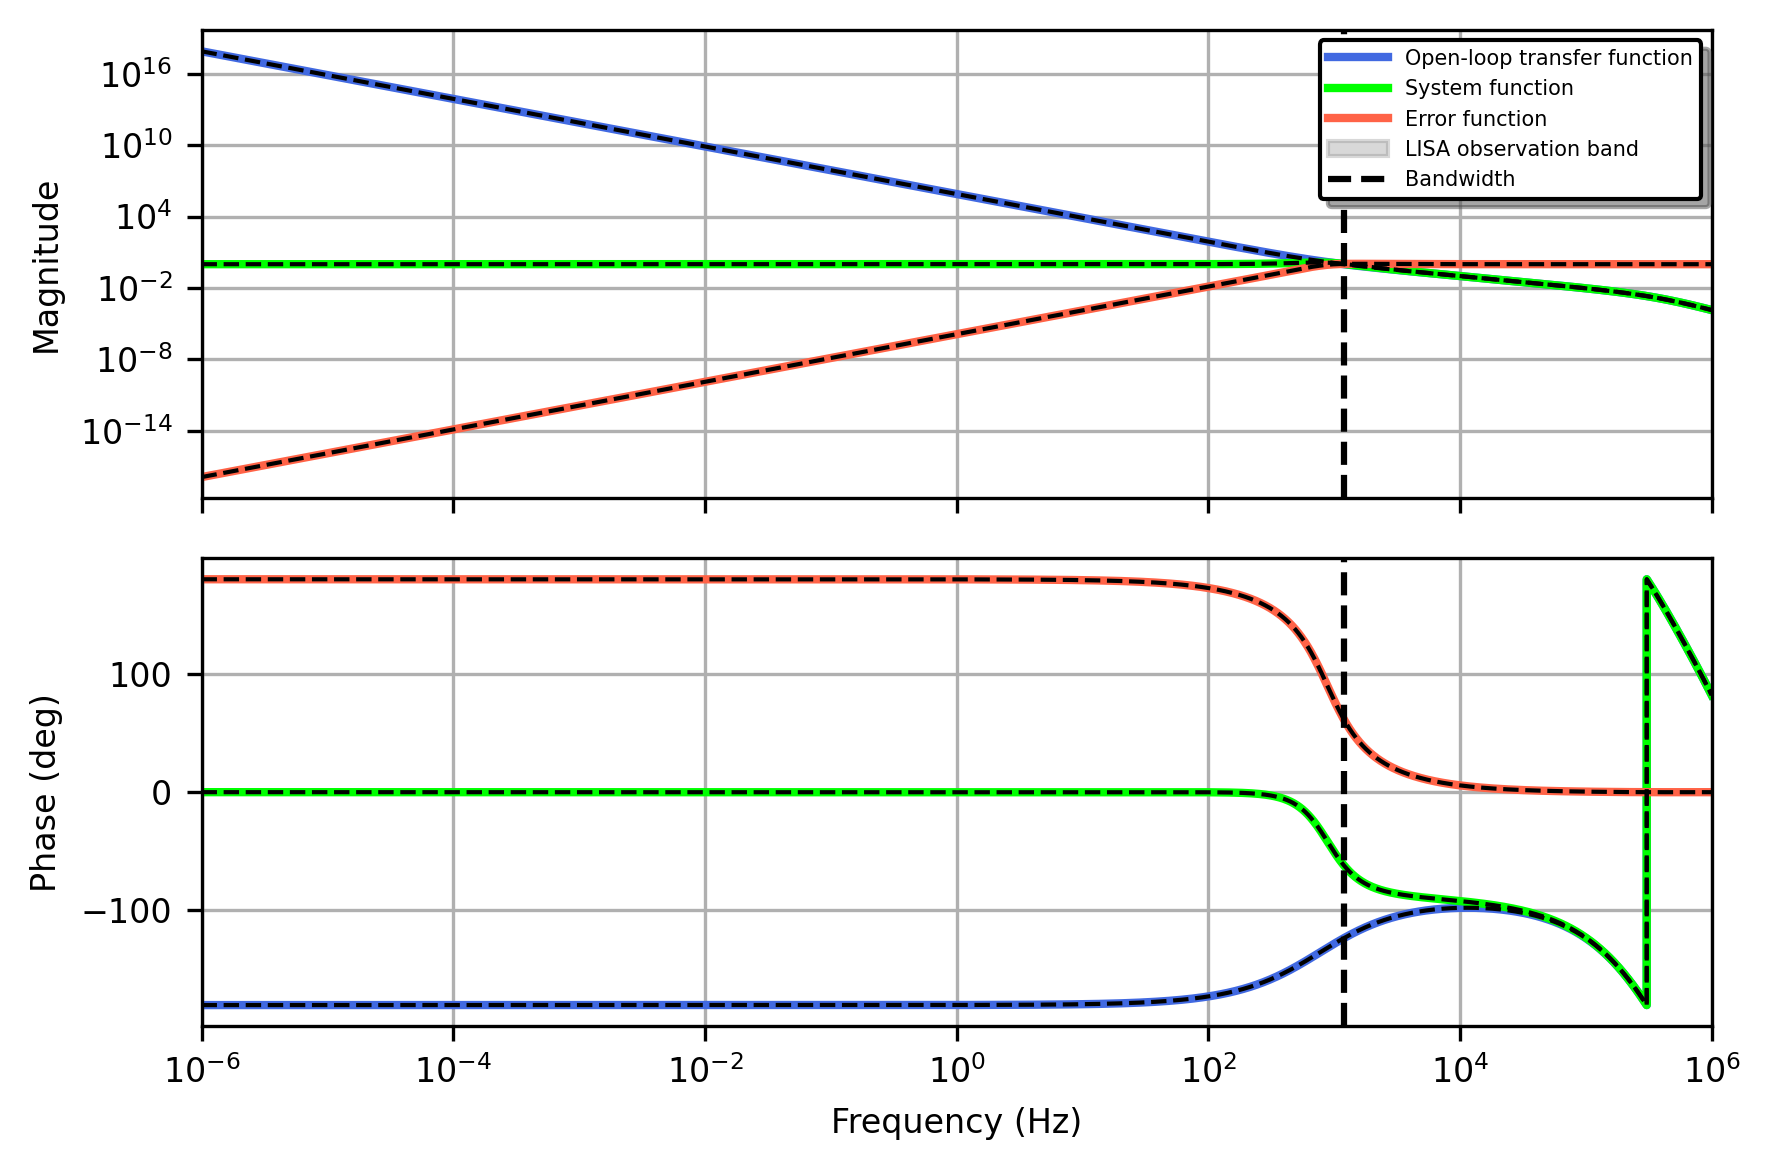

In [18]:
fig = loop_bode_plot(frfr, pll_1, pll_2)